# 필요한 라이브러리 import

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('./CarPrice_Assignment.csv')

In [6]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# EDA 및 전처리

## 결측치 확인 및 불필요한 변수 제거

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

- 결측치 없음
- 범주형 변수 처리 필요
- 수치형 변수 분포 확인 필요

In [8]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

- car_ID는 전체 데이터셋 갯수만큼 존재
- 학습에 필요없음을 가정

In [9]:
# 수치형 데이터만 포함한 데이터 프레임
numeric_df = df.select_dtypes(include=['number'])

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


<Axes: >

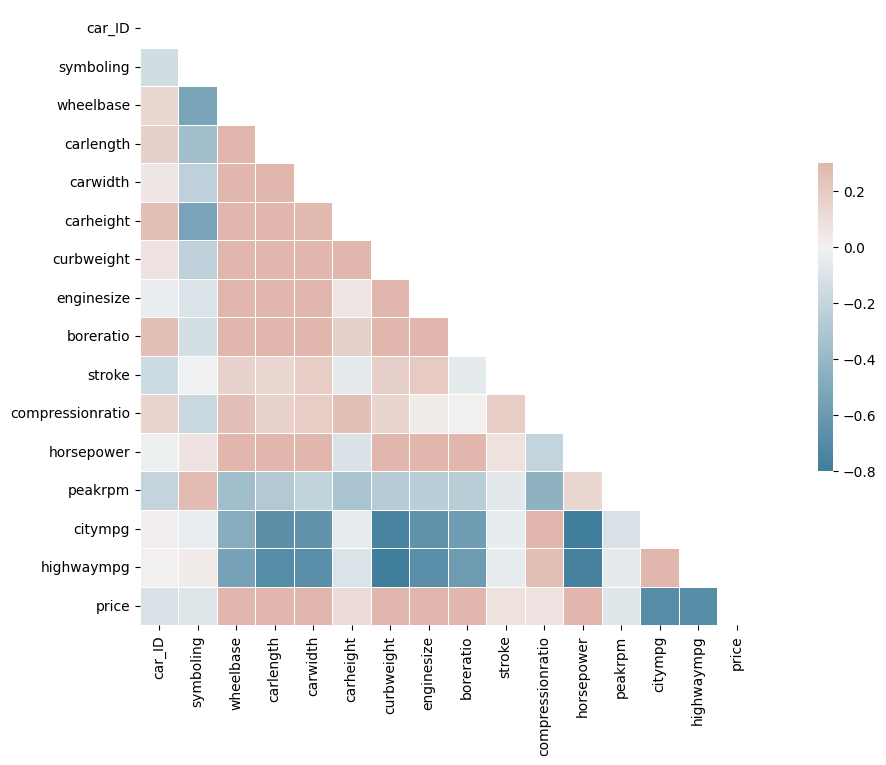

In [10]:
f, ax = plt.subplots(figsize=(16, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr = numeric_df.corr()
print(corr['price'].sort_values(ascending=False))

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

- car_ID는 자동차에 대한 고유 ID이기 때문에 필요없음
- 상관계수가 낮은 symboling도 제거

In [57]:
X = df.drop(['price'], axis = 1)
y = df['price']

# 범주형 변수 분석

In [58]:
# 범주형 데이터만 포함한 데이터 프레임
categorical_df = X.select_dtypes(exclude=['number'])
numerical_df = X.select_dtypes(include=['number'])

In [59]:
categorical_df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [60]:
numerical_df.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [61]:
categorical_df.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

### CarName 컬럼 분석

In [62]:
categorical_df['CarName'].nunique()

147

In [63]:
categorical_df[categorical_df['CarName'].str.contains('audi', case=False)]

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
5,audi fox,gas,std,two,sedan,fwd,front,ohc,five,mpfi
6,audi 100ls,gas,std,four,sedan,fwd,front,ohc,five,mpfi
7,audi 5000,gas,std,four,wagon,fwd,front,ohc,five,mpfi
8,audi 4000,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
9,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,ohc,five,mpfi


In [64]:
categorical_df['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [65]:
categorical_df[categorical_df['CarName'].str.contains('diesel', case=False)]

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
9,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,ohc,five,mpfi
114,peugeot 505s turbo diesel,diesel,turbo,four,wagon,rwd,front,l,four,idi
199,volvo diesel,gas,turbo,four,wagon,rwd,front,ohc,four,mpfi


- 잘보면, CarName에 디젤이지만 fueltype이 gas인 것도 있다.
- 디젤로 바꿔주자

In [66]:
categorical_df[categorical_df['CarName'].str.contains('diesel', case=False)]['fueltype'].apply(lambda x : 'diesel')

9      diesel
114    diesel
199    diesel
Name: fueltype, dtype: object

In [67]:
categorical_df

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [68]:
for i in categorical_df.columns:
    print(i, ':', categorical_df[i].unique())

CarName : ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick o

In [69]:
# doornumber와 cylindernumber는 수치형으로 변환해야할 것 같다.

### doornumber 수치형으로 변환

In [70]:
def str_to_number(x):
    
    num_dict = {'one':1,
               'two': 2,
               'three': 3,
               'four': 4,
               'five': 5,
               'six': 6,
               'seven': 7,
               'eight': 8,
               'nine': 9,
               'ten': 10,
               'eleven': 11,
               'twelve':12}
    
    return num_dict[x]

In [71]:
categorical_df['doornumber'] = categorical_df['doornumber'].apply(lambda x : str_to_number(x))
categorical_df['cylindernumber'] = categorical_df['cylindernumber'].apply(lambda x : str_to_number(x))

In [72]:
categorical_df

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,2,convertible,rwd,front,dohc,4,mpfi
1,alfa-romero stelvio,gas,std,2,convertible,rwd,front,dohc,4,mpfi
2,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi
3,audi 100 ls,gas,std,4,sedan,fwd,front,ohc,4,mpfi
4,audi 100ls,gas,std,4,sedan,4wd,front,ohc,5,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,4,sedan,rwd,front,ohc,4,mpfi
201,volvo 144ea,gas,turbo,4,sedan,rwd,front,ohc,4,mpfi
202,volvo 244dl,gas,std,4,sedan,rwd,front,ohcv,6,mpfi
203,volvo 246,diesel,turbo,4,sedan,rwd,front,ohc,6,idi


### CarName

In [73]:
categorical_df['CarName']

# 자동차명은 브랜드만 추출한뒤 다른 컬럼들과의 조합에 따라 어떤 차종인지를 대략적으로 학습 가능하다고 판단
# 따라서, 브랜드 명만 남겨준다.

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [74]:
# 가장 첫 문자열이 브랜드인지 확인
for i in categorical_df['CarName']:
    print(i)

alfa-romero giulia
alfa-romero stelvio
alfa-romero Quadrifoglio
audi 100 ls
audi 100ls
audi fox
audi 100ls
audi 5000
audi 4000
audi 5000s (diesel)
bmw 320i
bmw 320i
bmw x1
bmw x3
bmw z4
bmw x4
bmw x5
bmw x3
chevrolet impala
chevrolet monte carlo
chevrolet vega 2300
dodge rampage
dodge challenger se
dodge d200
dodge monaco (sw)
dodge colt hardtop
dodge colt (sw)
dodge coronet custom
dodge dart custom
dodge coronet custom (sw)
honda civic
honda civic cvcc
honda civic
honda accord cvcc
honda civic cvcc
honda accord lx
honda civic 1500 gl
honda accord
honda civic 1300
honda prelude
honda accord
honda civic
honda civic (auto)
isuzu MU-X
isuzu D-Max 
isuzu D-Max V-Cross
isuzu D-Max 
jaguar xj
jaguar xf
jaguar xk
maxda rx3
maxda glc deluxe
mazda rx2 coupe
mazda rx-4
mazda glc deluxe
mazda 626
mazda glc
mazda rx-7 gs
mazda glc 4
mazda 626
mazda glc custom l
mazda glc custom
mazda rx-4
mazda glc deluxe
mazda 626
mazda glc
mazda rx-7 gs
buick electra 225 custom
buick century luxus (sw)
buick cen

In [75]:
categorical_df['CarName'] = categorical_df['CarName'].apply(lambda x : x.split()[0])

In [76]:
categorical_df.nunique()

CarName           28
fueltype           2
aspiration         2
doornumber         2
carbody            5
drivewheel         3
enginelocation     2
enginetype         7
cylindernumber     7
fuelsystem         8
dtype: int64

In [77]:
categorical_df

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi
3,audi,gas,std,4,sedan,fwd,front,ohc,4,mpfi
4,audi,gas,std,4,sedan,4wd,front,ohc,5,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,4,sedan,rwd,front,ohc,4,mpfi
201,volvo,gas,turbo,4,sedan,rwd,front,ohc,4,mpfi
202,volvo,gas,std,4,sedan,rwd,front,ohcv,6,mpfi
203,volvo,diesel,turbo,4,sedan,rwd,front,ohc,6,idi


## 데이터 병합

In [79]:
new_df = pd.concat([categorical_df, numerical_df], axis = 1)

In [80]:
new_df

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,audi,gas,std,4,sedan,fwd,front,ohc,4,mpfi,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,audi,gas,std,4,sedan,4wd,front,ohc,5,mpfi,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,4,sedan,rwd,front,ohc,4,mpfi,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,volvo,gas,turbo,4,sedan,rwd,front,ohc,4,mpfi,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,volvo,gas,std,4,sedan,rwd,front,ohcv,6,mpfi,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,volvo,diesel,turbo,4,sedan,rwd,front,ohc,6,idi,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [81]:
new_df.select_dtypes(include=['number'])

,doornumber,cylindernumber,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,2,4,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,2,4,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,2,6,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,4,4,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,4,5,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,4,4,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,4,4,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,4,6,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,4,6,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


<Axes: >

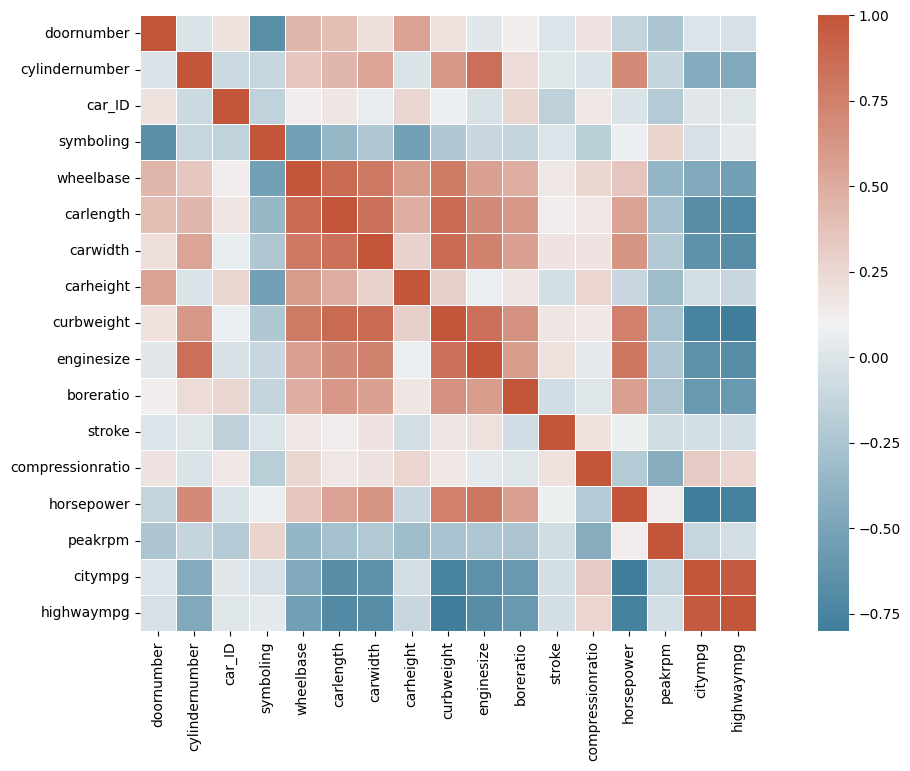

In [83]:
f, ax = plt.subplots(figsize=(16, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr = new_df.select_dtypes(include=['number']).corr()

sns.heatmap(corr, cmap=cmap, square=True, linewidths=.5)

### 전처리

In [84]:
#기본적인 전처리를 위한 라이브러리
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [85]:
cat_idx = new_df.select_dtypes(exclude=['number']).columns
num_idx = new_df.select_dtypes(include=['number']).columns

In [86]:
t = [('cat', OneHotEncoder(handle_unknown = "ignore"), cat_idx), ('num', StandardScaler(), num_idx)]

In [87]:
col_transform = ColumnTransformer(transformers=t)

In [88]:
col_transform

ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'],
      dtype='object')),
                                ('num', StandardScaler(),
                                 Index(['doornumber', 'cylindernumber', 'car_ID', 'symboling', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg'],
      dtype='object'))])

In [89]:
new_df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,alfa-romero,gas,std,2,convertible,rwd,front,dohc,4,mpfi,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,alfa-romero,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,audi,gas,std,4,sedan,fwd,front,ohc,4,mpfi,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,audi,gas,std,4,sedan,4wd,front,ohc,5,mpfi,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [91]:
X_std = col_transform.fit_transform(new_df)

In [93]:
X_std.shape

(205, 74)

In [94]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from lightgbm import LGBMRegressor

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

In [115]:
#model 정의
models = {
    'RandomForest': (RandomForestRegressor(),
                 {
                     'n_estimators': [50, 100],
                     'max_depth': [2, 20],
                     'min_samples_split':[5, 100],
                 }),
    'XGBoost': (XGBRegressor(),
                {
                     'n_estimators': [50, 100],
                     'max_depth': [2, 20],
                     'min_child_samples':[5, 100],
                }),
    'GB': (GradientBoostingRegressor(),
                 {
                     'n_estimators': [50, 100],
                     'max_depth': [2, 20],
                     'min_samples_split':[5, 100],
                 }),
    'ExtraTree': (ExtraTreesRegressor(),
                  {
                     'n_estimators': [50, 100],
                     'max_depth': [2, 20],
                     'min_samples_split':[5, 100],
                 })
}

In [121]:
model_results = []

# 모델별로 튜닝 및 적합
for model_name, (model, param_grid) in models.items():
    print(f"Start {model_name} Training!")
    search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error',  n_jobs=-1)
    search.fit(X_train, y_train)

    # 최적의 모델과 하이퍼파라미터 출력
    best_model =search.best_estimator_
    best_params =search.best_params_
    print(f"Best Parameters: {best_params}")

    # 테스트 데이터에 대한 예측 및 평가
    y_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"rmse: {rmse}\n")
    # 모델 이름과 accuracy 결과 저장
    model_results.append((model_name, best_model, rmse))

Start RandomForest Training!
Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
rmse: 1903.3561563636247

Start XGBoost Training!


/opt/conda/envs/machine_learning/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [06:58:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/envs/machine_learning/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [06:58:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/envs/machine_learning/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [06:58:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/envs/machine_learning/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [06:58:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_child_samples" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/envs/machine_learning/lib/python3.10/site-packages/xg

KeyboardInterrupt: 

In [122]:
model_results

[('RandomForest',
  RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=50),
  1903.3561563636247)]

In [126]:
# Random Forest의 결과가 제일 좋았음

y_pred = model_results[0][1].predict(X_test)

In [127]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [128]:
print("MAE :", mean_absolute_error(y_pred, y_test))
print("MSE :", mean_squared_error(y_pred, y_test))

MAE : 1333.2316226111284
MSE : 3622764.657967311
